In [51]:
from pymutspec import draw
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, wilcoxon

PATH_TO_12MUTSPEC = '/home/gabs/Documents/lab/TermitesAndCockroaches/mtdna-mutspec-insecta/data/NemuPipeline/AllInsects/midori_all_insects_mutspec/ms12syn_internal_iqtree.tsv'
PATH_TO_192MUTSPEC = '/home/gabs/Documents/lab/TermitesAndCockroaches/mtdna-mutspec-insecta/data/NemuPipeline/AllInsects/midori_all_insects_mutspec/ms192syn_internal_iqtree.tsv'
PATH_TO_METADATA = '/home/gabs/Documents/lab/TermitesAndCockroaches/mtdna-mutspec-insecta/data/NemuPipeline/AllInsects/midori_all_insects_mutspec/msMetaData.tsv'
PATH_TO_CODONTABLE = '/home/gabs/Documents/lab/TermitesAndCockroaches/mtdna-mutspec-insecta/data/DescriptiveStat/codontable_midori_blattodea.csv'

In [32]:
mutspec12 = pd.read_csv(PATH_TO_12MUTSPEC, sep='\t')
mutspec192 = pd.read_csv(PATH_TO_192MUTSPEC, sep='\t')
#PROBABLY NEED TO INVERT NUCLS

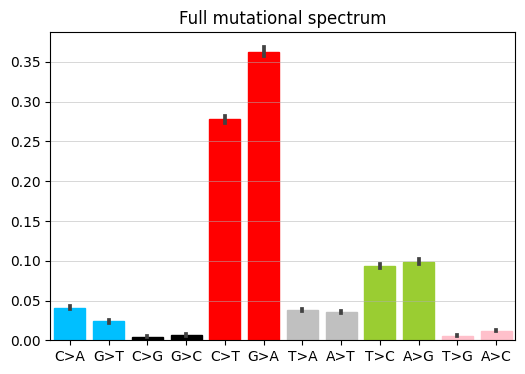

<AxesSubplot:title={'center':'Full mutational spectrum'}>

In [4]:
draw.plot_mutspec12(mutspec12, savepath='/home/gabs/Documents/lab/TermitesAndCockroaches/mtdna-mutspec-insecta/figures/midori_all_insects_mutspec/mutspec12.pdf')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


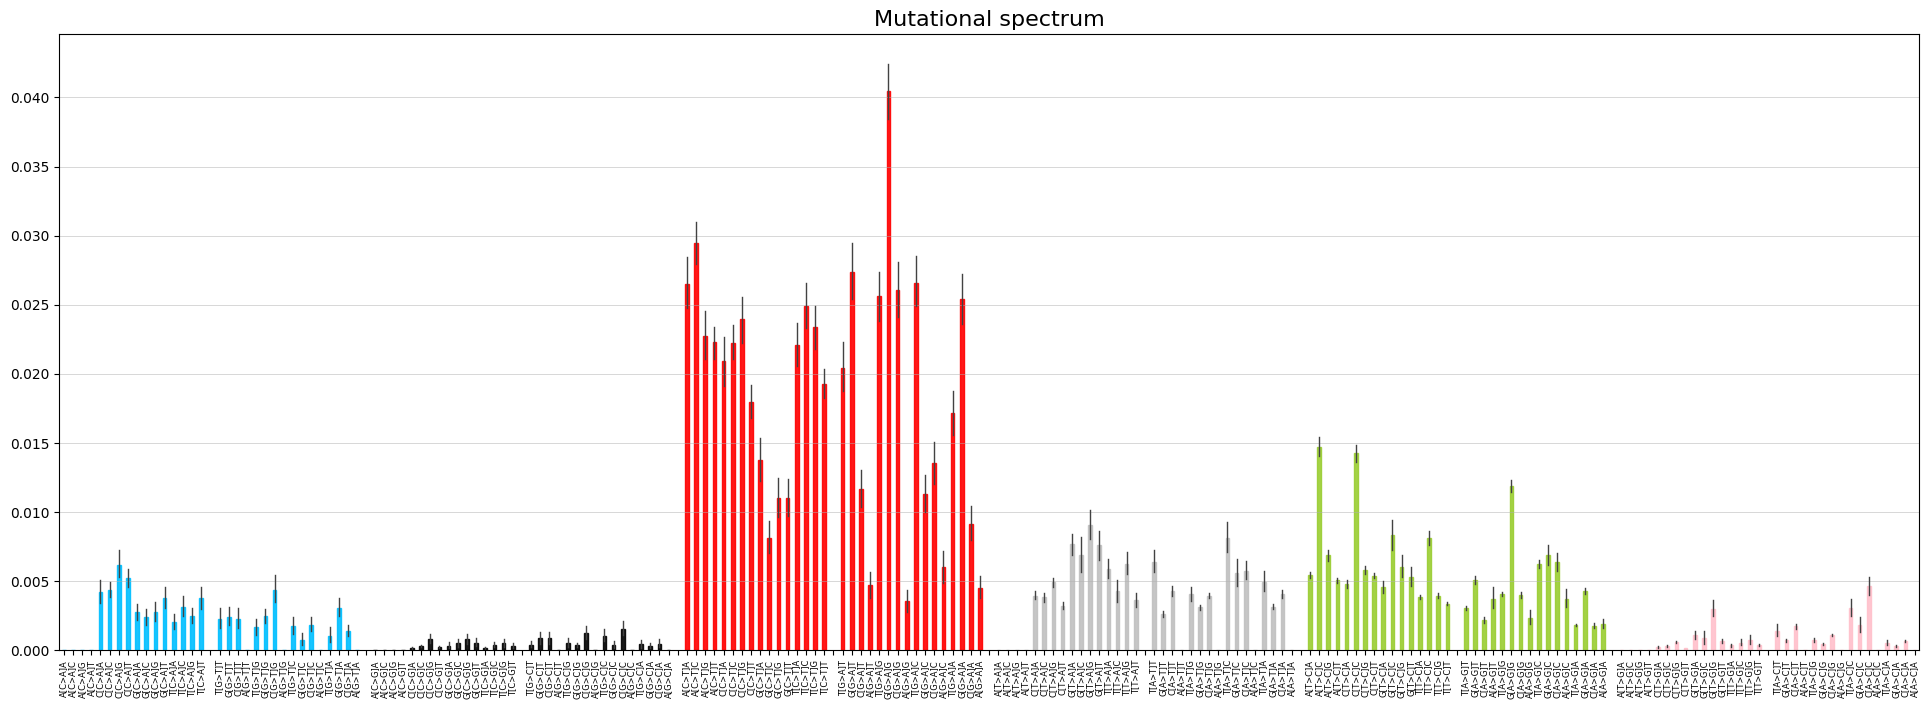

In [5]:
draw.plot_mutspec192(mutspec192, savepath='/home/gabs/Documents/lab/TermitesAndCockroaches/mtdna-mutspec-insecta/figures/midori_all_insects_mutspec/mutspec192.pdf')

In [33]:
metadata = pd.read_csv(PATH_TO_METADATA, sep='\t', index_col=0)
blattodea_meta = metadata.loc[metadata['Order'] == 'Blattodea_85823']

In [34]:
terms_meta = [] 
terms_meta.append(blattodea_meta.loc[blattodea_meta['Family'] == 'Rhinotermitidae_36985'])
terms_meta.append(blattodea_meta.loc[blattodea_meta['Family'] == 'Termitidae_46569'])
terms_meta = pd.concat(terms_meta)
terms_meta.reset_index(inplace=True)

cocks_meta = []
cocks_meta.append(blattodea_meta.loc[blattodea_meta['Family'] == 'Blattidae_6974'])
cocks_meta.append(blattodea_meta.loc[blattodea_meta['Family'] == 'Cryptocercidae_36982'])
cocks_meta.append(blattodea_meta.loc[blattodea_meta['Family'] == 'Ectobiidae_1049651'])
cocks_meta = pd.concat(cocks_meta)
cocks_meta.reset_index(inplace=True)

In [21]:
blattodea_codontable = pd.read_csv(PATH_TO_CODONTABLE, index_col=0)
blattodea_codontable['Species_name'] = list(map(lambda sp: f'{sp.split("_")[0]}_{sp.split("_")[1]}', blattodea_codontable['Species_name']))

term_codontable = []
for sp in terms_meta['Species']:
    term_codontable.append(blattodea_codontable.loc[blattodea_codontable['Species_name'] == sp])
term_codontable = pd.concat(term_codontable)

cocks_codontable = []
for sp in cocks_meta['Species']:
    cocks_codontable.append(blattodea_codontable.loc[blattodea_codontable['Species_name'] == sp])
cocks_codontable = pd.concat(cocks_codontable)

Text(0.5, 1.0, 'Nucleotide content of Blattodea')

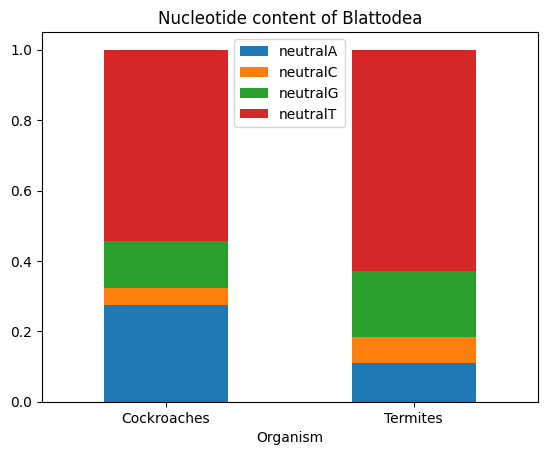

In [61]:
#!!!! NUCL VALUES ARE INVERTED FOR NOW
def get_codontable(codontable, organism):
    codontable.rename(columns={'neutralA' : 'neutralT', 'neutralT' : 'neutralA', 'neutralG' : 'neutralC', 'neutralC' : 'neutralG'}, inplace=True)
    atgc_table = codontable.agg({'neutralA' : 'sum', 'neutralT' : 'sum', 'neutralG' : 'sum', 'neutralC' : 'sum'}).to_frame(name='count')
    atgc_table['Organism'] = organism
    atgc_table['normalized_count'] = np.nan
    atgc_table.at['neutralA', 'normalized_count'] = atgc_table.at['neutralA', 'count'] / atgc_table['count'].sum()
    atgc_table.at['neutralT', 'normalized_count'] = atgc_table.at['neutralT', 'count'] / atgc_table['count'].sum()
    atgc_table.at['neutralG', 'normalized_count'] = atgc_table.at['neutralG', 'count'] / atgc_table['count'].sum()
    atgc_table.at['neutralC', 'normalized_count'] = atgc_table.at['neutralC', 'count'] / atgc_table['count'].sum()
    return atgc_table

atgc_table = pd.concat([get_codontable(cocks_codontable, 'Cockroaches'), get_codontable(term_codontable, 'Termites')])

pivoted = pd.pivot_table(atgc_table, columns=atgc_table.index, index=['Organism'])
pivoted = pivoted.drop(columns=['count'])
pivoted.columns = pivoted.columns.droplevel()

pivoted.plot(kind='bar', stacked=True)
plt.legend(loc='upper center')
plt.xticks(rotation = 0)
plt.title('Nucleotide content of Blattodea')

In [36]:
cocks_mutspec12 = []
for sp in cocks_meta['Species']:
    cocks_mutspec12.append(mutspec12.loc[mutspec12['Species'] == sp])
cocks_mutspec12 = pd.concat(cocks_mutspec12)

terms_mutspec12 = []
for sp in terms_meta['Species']:
    terms_mutspec12.append(mutspec12.loc[mutspec12['Species'] == sp])
terms_mutspec12 = pd.concat(terms_mutspec12)

In [57]:
cocks_TC = cocks_mutspec12[cocks_mutspec12['Mut'] == 'T>C']
term_TC = terms_mutspec12[terms_mutspec12['Mut'] == 'T>C']
cocks_AG = cocks_mutspec12[cocks_mutspec12['Mut'] == 'A>G']
term_AG = terms_mutspec12[terms_mutspec12['Mut'] == 'A>G']

In [54]:
ttest_ind(term_TC['MutSpec'], cocks_TC['MutSpec'])

Ttest_indResult(statistic=2.9040285425263503, pvalue=0.007996516154258976)

In [58]:
ttest_ind(term_AG['MutSpec'], cocks_AG['MutSpec'])

Ttest_indResult(statistic=0.3452964699264137, pvalue=0.733009519519739)

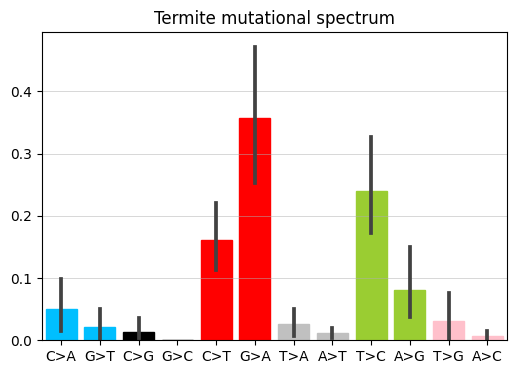

<AxesSubplot:title={'center':'Termite mutational spectrum'}>

In [12]:
draw.plot_mutspec12(terms_mutspec12, title='Termite mutational spectrum')

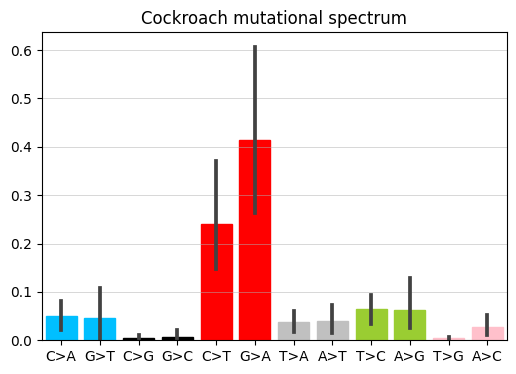

<AxesSubplot:title={'center':'Cockroach mutational spectrum'}>

In [13]:
draw.plot_mutspec12(cocks_mutspec12, title='Cockroach mutational spectrum')